### 1. Import the necessary libraries.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import seaborn as sns 

from my_modules import my_functions as mybib
from my_modules import lab_functions as lab

# change the color palette for seaborn functions
sns.set_theme(palette = "crest")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [4]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')


### 3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

In [5]:
# First look at the dataframe
mybib.firstLook(customer_df)
mybib.nullTable(customer_df)



(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


,header_name,percent_nulls
0,Customer,0.0
1,State,0.0
2,Customer Lifetime Value,0.0
3,Response,0.0
4,Coverage,0.0
5,Education,0.0
6,Effective To Date,0.0
7,EmploymentStatus,0.0
8,Gender,0.0
9,Income,0.0


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
# Clean column names

lab.clean_column_names(customer_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5. Change effective to date column to datetime format.

In [7]:
# Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], infer_datetime_format=True)
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_costs                     int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

In [8]:
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df


,customer_lifetime_value,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
columns = numerical_df.columns

for col in columns:
    print(f"""
Unique Values for column: {col} -> Number of unique values: {numerical_df[col].nunique()}
{numerical_df[col].unique()}

""")


Unique Values for column: customer_lifetime_value -> Number of unique values: 8041
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]



Unique Values for column: income -> Number of unique values: 5694
[56274     0 48767 ... 66367 71941 21941]



Unique Values for column: monthly_premium_costs -> Number of unique values: 202
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 

In [10]:
continuous_df, discrete_df = lab.categorize_variables(numerical_df)

display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


### 7. Plot a correlation matrix, comment what you see.

All the continues variables have a higher correlation to total_claim amount than the discrete variable. 

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_costs,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<Axes: >

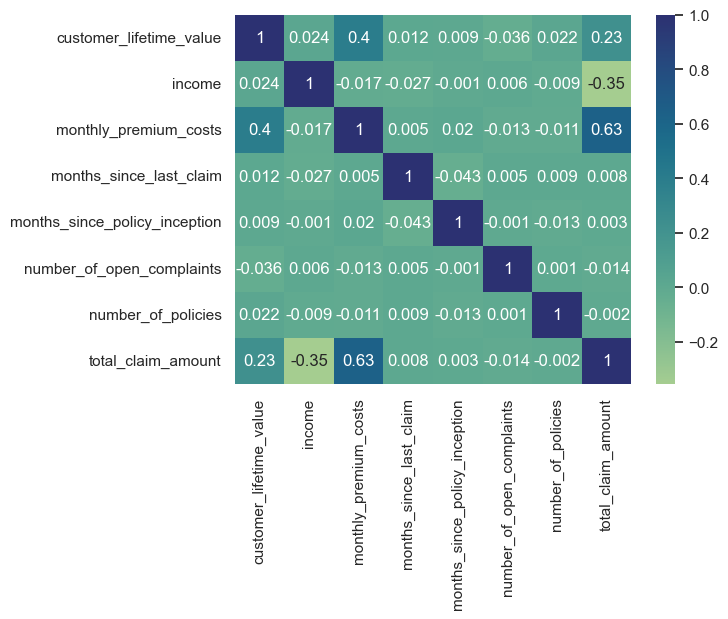

In [11]:
import seaborn as sns

correlations_matrix = round(numerical_df.corr(), 3)
display(numerical_df.describe().T)
sns.heatmap(correlations_matrix, annot=True, cmap='crest')

### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

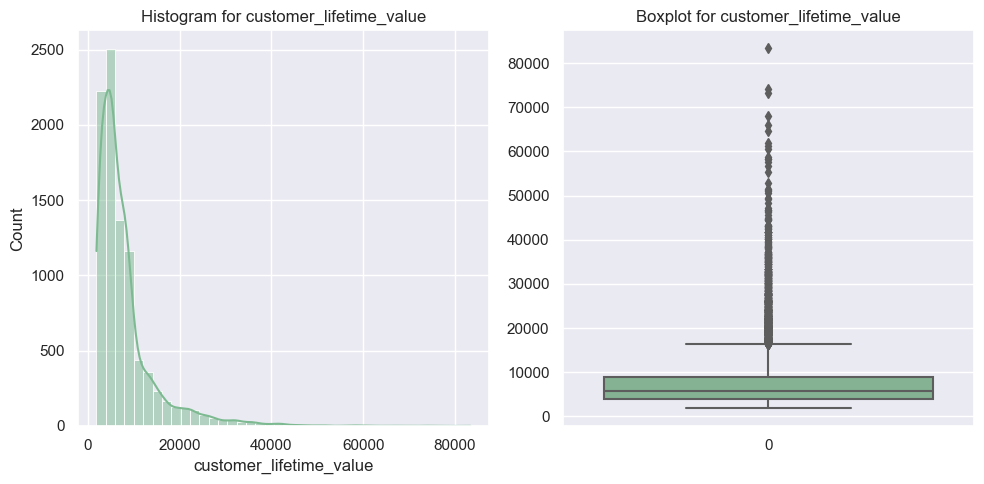

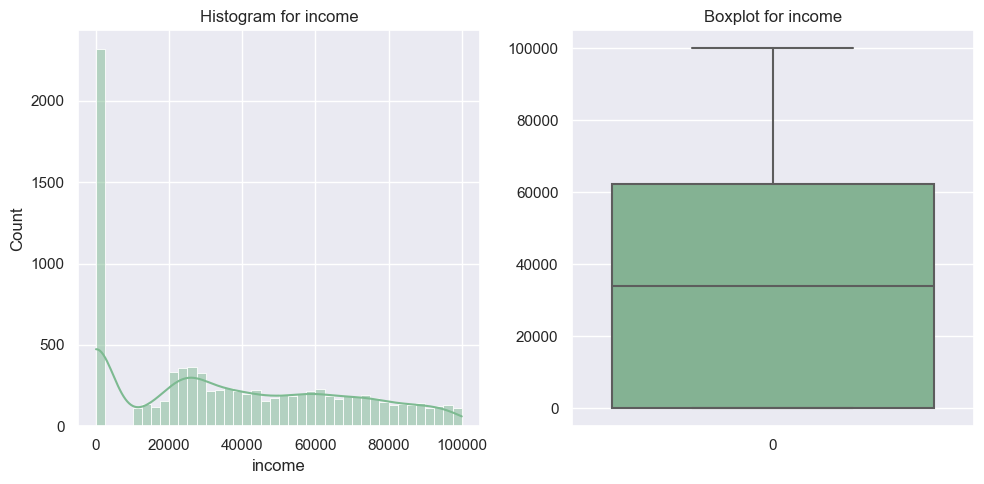

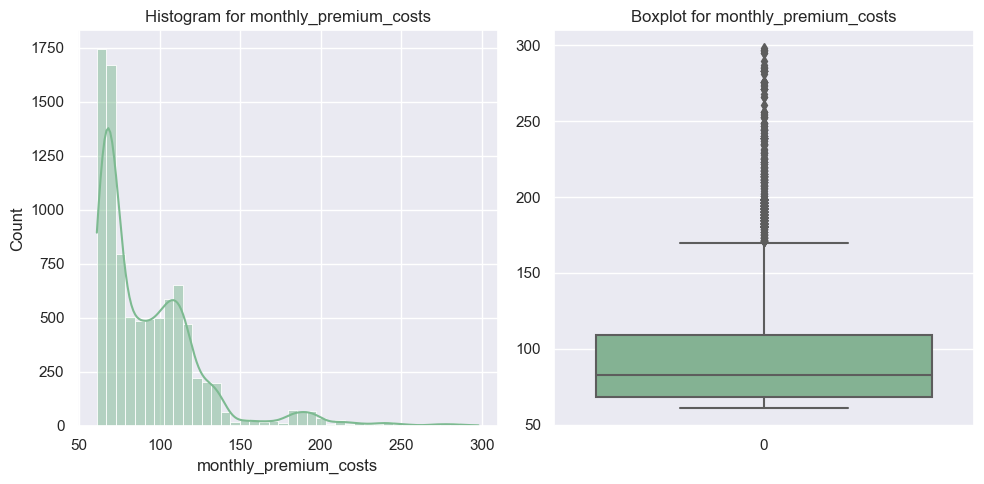

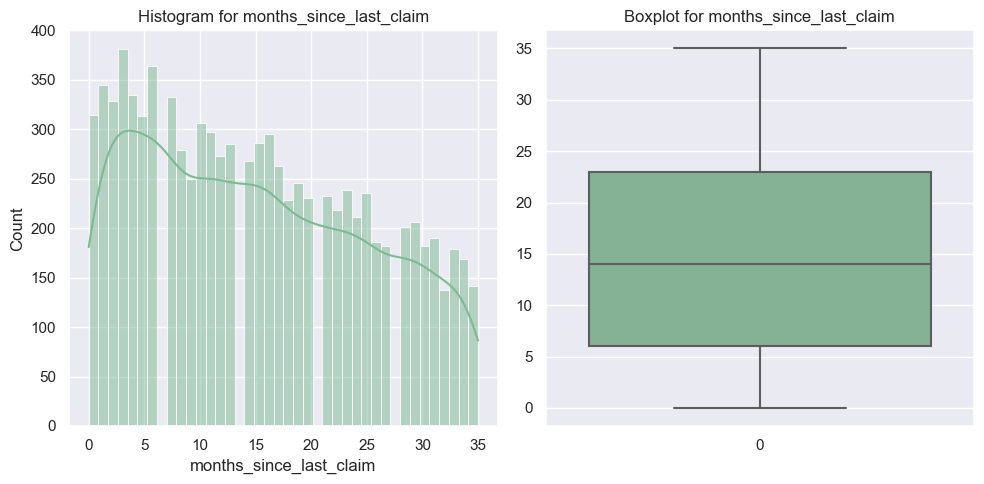

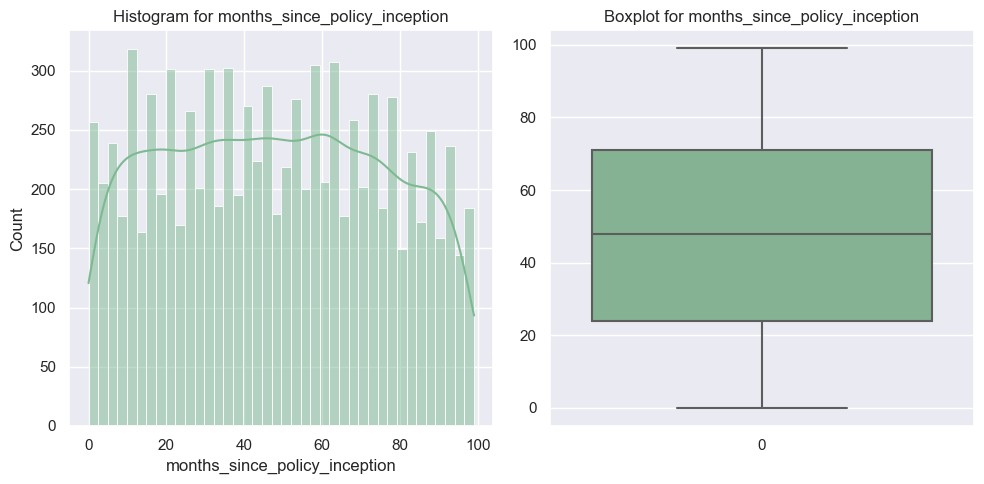

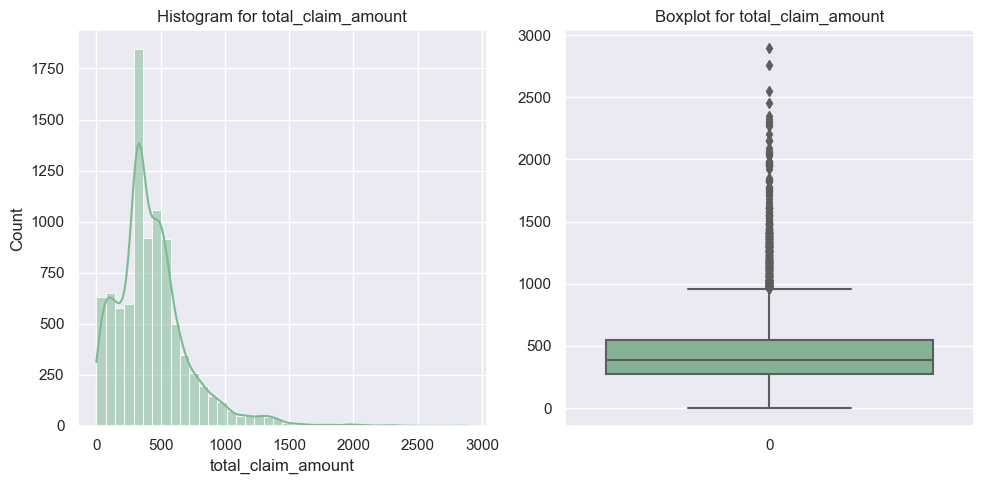

In [12]:
# mybib.hist_plot(continuous_df, 20)
lab.plot_continuous_var(continuous_df, 40)


**For continuous variables:**

- **customer_lifetime_value:** The distribution is right-skewed with **several outliers** on the higher end.
- **income:** A significant number of customers appear to have an income of 0, and the distribution for non-zero incomes is approximately uniform.
- **monthly_premium_costs:** The distribution is right-skewed with **several outliers** visible on the higher end.
- **months_since_last_claim:** The distribution shows pattern where there are no values in an interval of aprrox. every 6/7 month.
- **months_since_policy_inception:** The distribution appears approximately uniform with regular peaks/spikes.
- **total_claim_amount:** Right-skewed distribution with a **few outliers** on the higher end.

In [13]:
# mybib.hist_plot(discrete_df,)

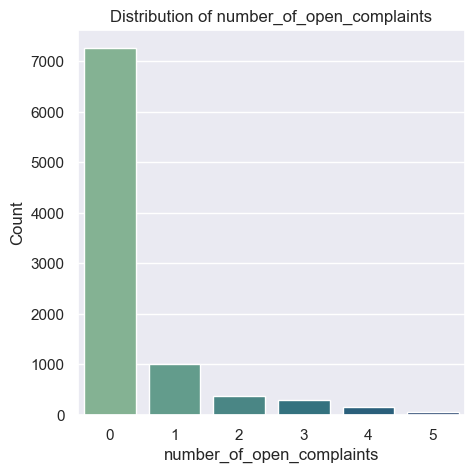

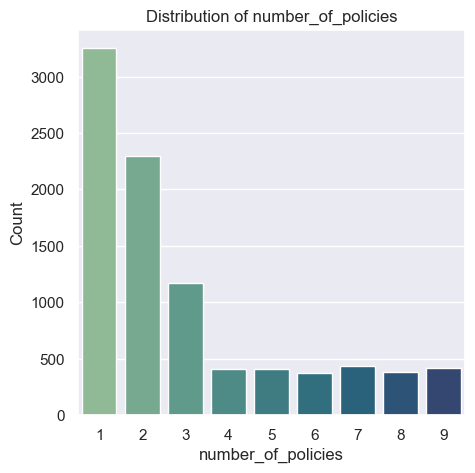

In [14]:
import matplotlib.pyplot as plt


lab.plot_discrete_var(discrete_df)

### 9. Comment what you can see in the plots.

#### For continuous variables:

- **customer_lifetime_value:** The distribution is right-skewed with several outliers on the higher end.
- **income:** A significant number of customers appear to have an income of 0, and the distribution for non-zero incomes is approximately uniform.
- **monthly_premium_costs:** The distribution is right-skewed with several outliers visible on the higher end.
- **months_since_last_claim:** The distribution shows pattern where there are no values in an interval of aprrox. every 6/7 month.
- **months_since_policy_inception:** The distribution appears approximately uniform with regular peaks/spikes.
- **total_claim_amount:** Right-skewed distribution with a few outliers on the higher end.

#### For discrete variables:

- **number_of_open_complaints:** Most customers do not have open complaints.
- **number_of_policies:** A significant number of customers have only 1 policy, with fewer having 2, and the number decreases progressively as the number of policies increases.

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

Outliers in the continuous variables can be found in the **customer_lifetime_value**, **monthly_premium_costs** and **total_claim_amount**.

In [15]:
# IQR + upper limit for outlier columns


upper_limit_customer_lifetime = lab.define_upper_limit(continuous_df, 'customer_lifetime_value')
upper_limit_monthly_premium = lab.define_upper_limit(continuous_df, 'monthly_premium_costs')
upper_limit_total_claim = lab.define_upper_limit(continuous_df, 'total_claim_amount')

Upper limit for customer_lifetime_value is 16414.04.
Upper limit for monthly_premium_costs is 170.5.
Upper limit for total_claim_amount is 960.4.


In [16]:
# check impact of deleting the outlier rows from the table
check_upper_limit_dataframe = customer_df.loc[(customer_df['customer_lifetime_value'] > upper_limit_customer_lifetime) | (customer_df['monthly_premium_costs'] > upper_limit_monthly_premium) | (customer_df['total_claim_amount'] > upper_limit_total_claim) ]
display(check_upper_limit_dataframe.shape)

outlier_impact = round(((len(check_upper_limit_dataframe) / len(customer_df)) * 100),2)
print(f"We would lose {outlier_impact}% of the data by removing the outlier rows from the table.")

(1287, 24)

We would lose 14.09% of the data by removing the outlier rows from the table.


### 11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

I decided to not remove them from the main dataframe because we than would loe 14% of the data. Furthermore, the outliers columns are these which are correlated with the target column. 

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

I already checked the null values at the beginning of the analysis. Since there are no NaN values in the data, I can skip this task.


### 13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.

In [17]:
numerical_df.to_csv("data/export/numerical_df.csv", index=False)

## lab cleaning categorical data

### 1. Find all of the categorical data. Save it in a categorical_df variable.

In [18]:
categorical_df = customer_df.select_dtypes(include = object)
categorical_df 


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 2. Check for NaN values and decide what to do with them, do it now.

Already happened during lab 1.

### 3. Check all unique values of columns.

In [19]:
lab.check_unique_values(categorical_df)


Unique Values for column: **customer** -> Number of unique values: **9134**
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Valuecounts: 
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
Dtype: object



Unique Values for column: **state** -> Number of unique values: **5**
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Valuecounts: 
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Dtype: object



Unique Values for column: **response** -> Number of unique values: **2**
['No' 'Yes']
Valuecounts: 
No     7826
Yes    1308
Name: response, dtype: int64
Dtype: object



Unique Values for column: **coverage** -> Number of unique values: **3**
['Basic' 'Extended' 'Premium']
Valuecounts: 
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: 

### 4. Check dtypes. Do they all make sense as categorical data?

Column response could also be a boolean. 

#### 5. Does any column contain alpha and numeric data? Decide how to clean it and do it now.
#### 7. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Columns for **policy** and **renew_offer_type** are alpha and numeric data.

The column **policy** contains information about the **type** of policy which is already present in the column **policy_type**. 
Furthermore, the column policy type contains a combination of the type(personal, corporate, special) and the word 'Auto'.

**Changes**
- The word 'Auto' will removed from the policy_type values since it applies to all policies
- The policy types will be removed from the policy columns since this information is already contained in the policy_type column.





<Axes: >

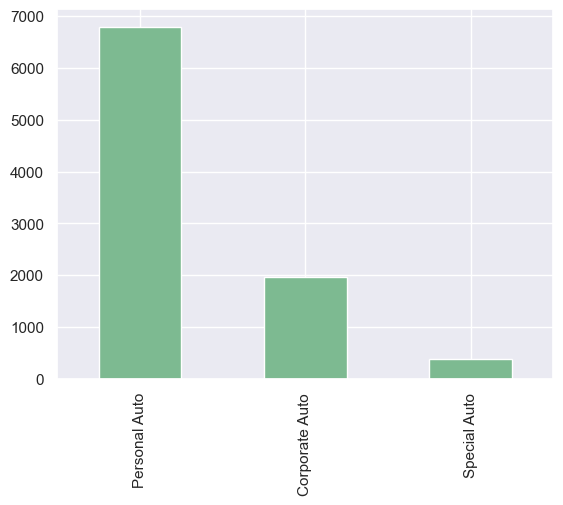

In [20]:
categorical_df.policy_type.value_counts().plot(kind='bar')

In [21]:
categorical_df['policy_type'] = categorical_df['policy_type'].str.slice(stop=-5)
categorical_df['policy_type'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy_type, dtype: int64

<Axes: >

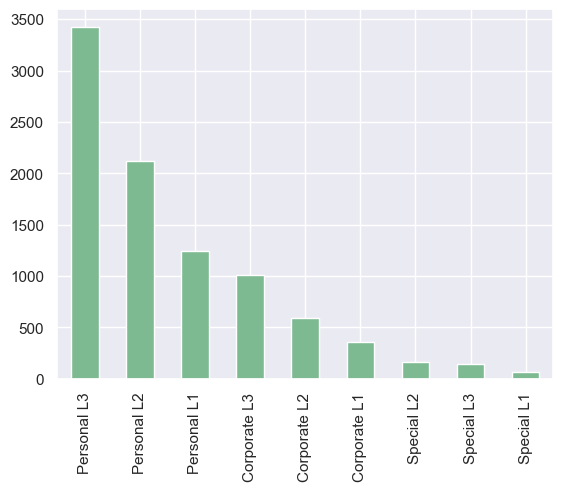

In [22]:
categorical_df.policy.value_counts().plot(kind='bar')


In [23]:
categorical_df['policy'] = categorical_df['policy'].str.slice(start=-2)
categorical_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

<Axes: >

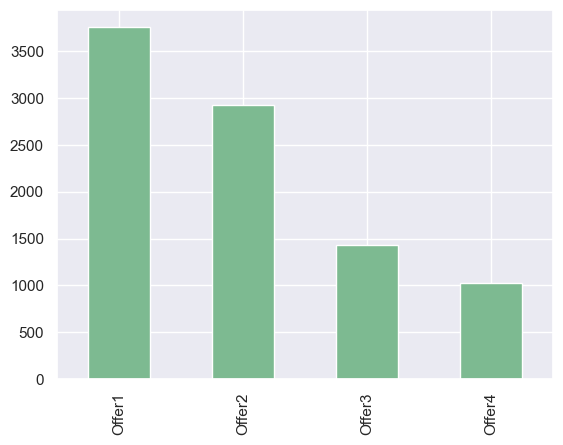

In [24]:
categorical_df.renew_offer_type.value_counts().plot(kind='bar')

### 6. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
 

### 8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

First, checked if vehicle class can be assigned to specific vehicle sizes. 
Decision: No, there seems no link between vehicle class and vehicle size therefore no changes on this column.

In [25]:
# Checking if we can 
categorical_df.groupby(['vehicle_size', 'vehicle_class']).agg({'customer':pd.Series.nunique})

customer
vehicle_size vehicle_class          
Large        Four-Door Car       475
             Luxury Car           16
             Luxury SUV           18
             SUV                 167
             Sports Car           49
             Two-Door Car        221
Medsize      Four-Door Car      3237
             Luxury Car          106
             Luxury SUV          125
             SUV                1308
             Sports Car          366
             Two-Door Car       1282
Small        Four-Door Car       909
             Luxury Car           41
             Luxury SUV           41
             SUV                 321
             Sports Car           69
             Two-Door Car        383

Second, checked if some vehicle classes can be summarized. 
Decision: Sports Car, Luxury SUV and Luxury Car have a lower amount than other car classes. Combining these three to class Luxury. 

In [26]:
print(categorical_df.vehicle_class.value_counts())

categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Luxury', categorical_df['vehicle_class'])

print(categorical_df.vehicle_class.value_counts())


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64


Third, checked if some employment status can be summarized
Decision: 'Medical Leave' 'Disabled' 'Retired' -> summarize to Other

In [27]:
print(categorical_df.employmentstatus.value_counts())

categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Medical Leave', 'Disabled', 'Retired']), 'Other', categorical_df['employmentstatus'])

print(categorical_df.employmentstatus.value_counts())


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64


In [28]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal,L2,Offer3,Branch,Four-Door Car,Large


### 9. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [29]:
categorical_df = categorical_df.drop(['customer'], axis=1)

categorical_df.to_csv('data/export/categorical.csv', index = False)

# Lab Feature extraction




### 2. Plot all the categorical variables with the proper plot. What can you see?

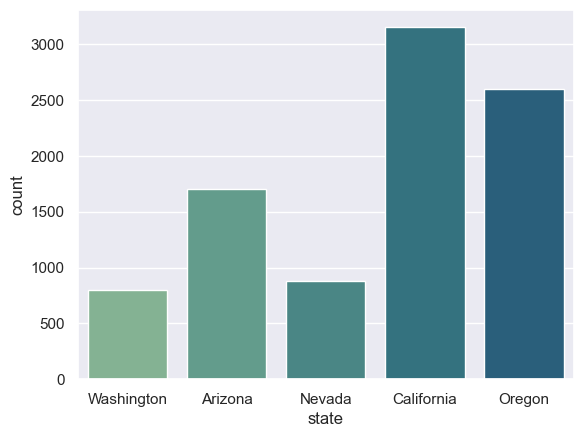

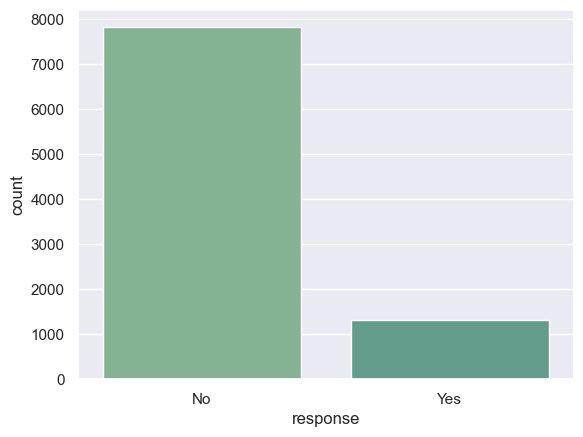

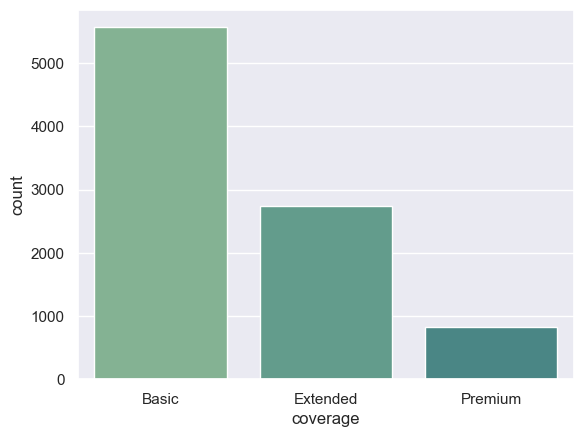

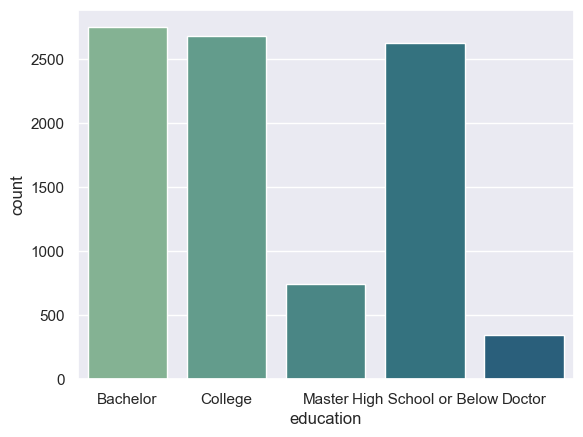

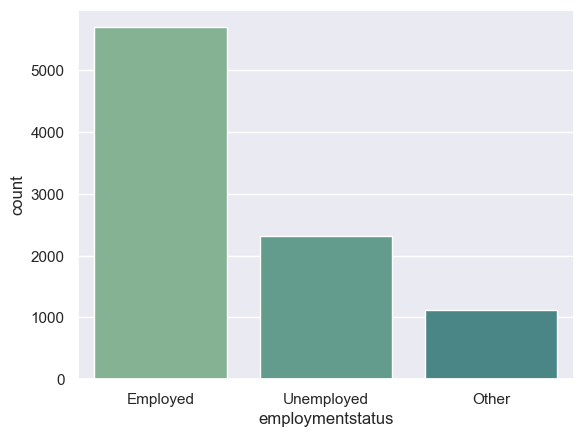

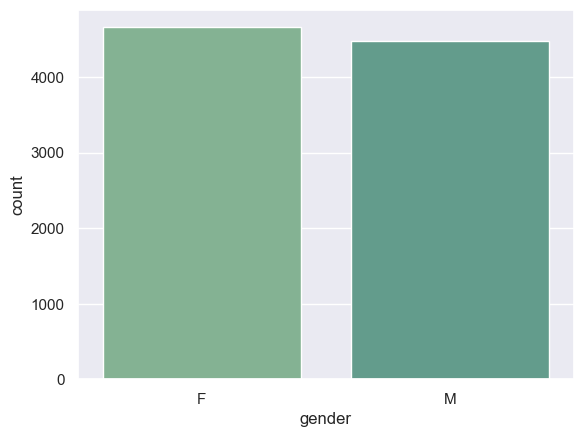

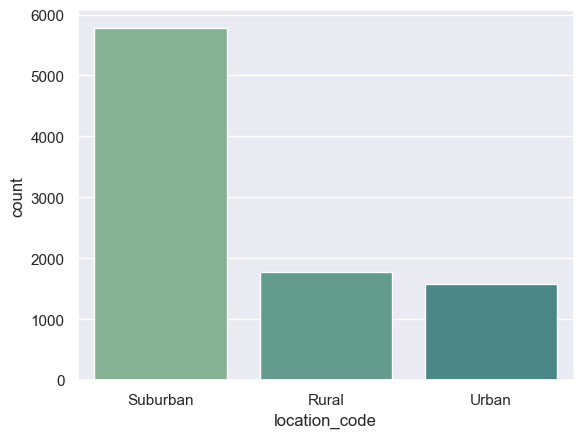

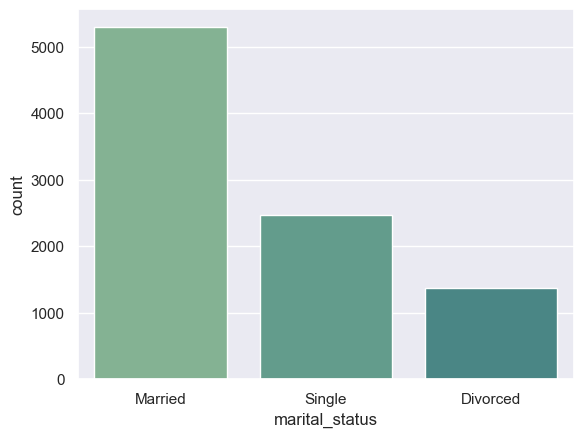

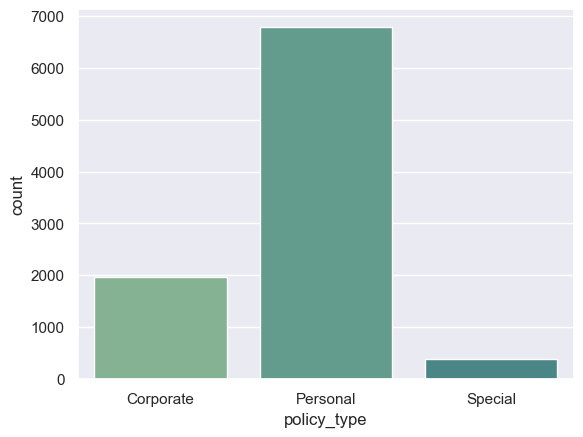

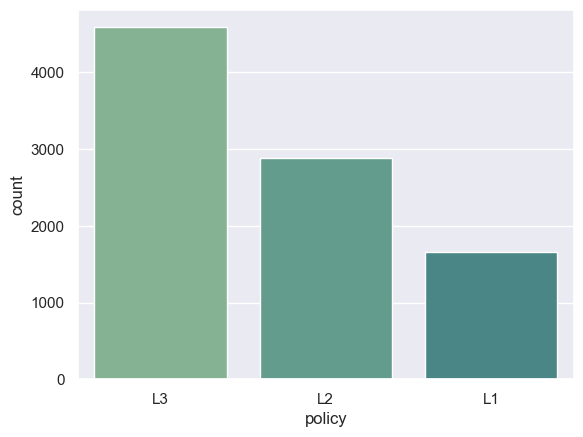

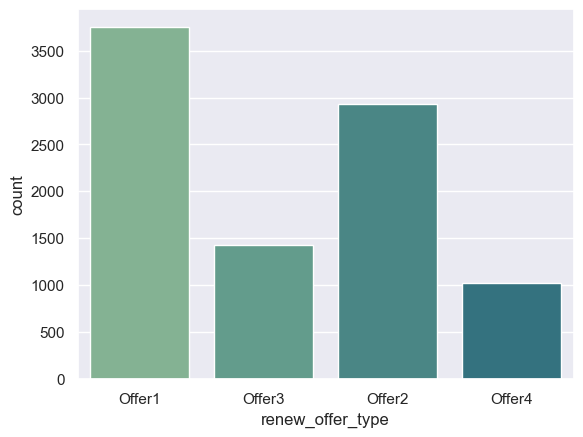

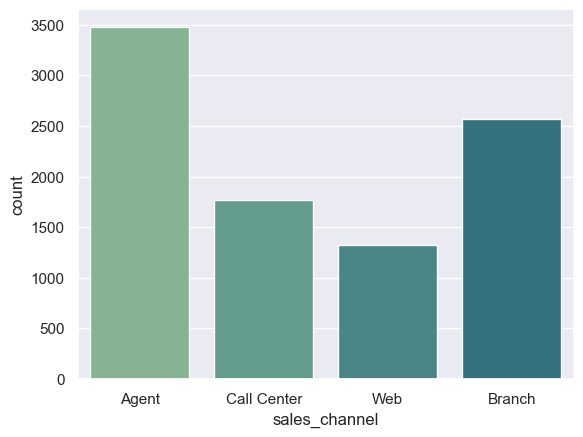

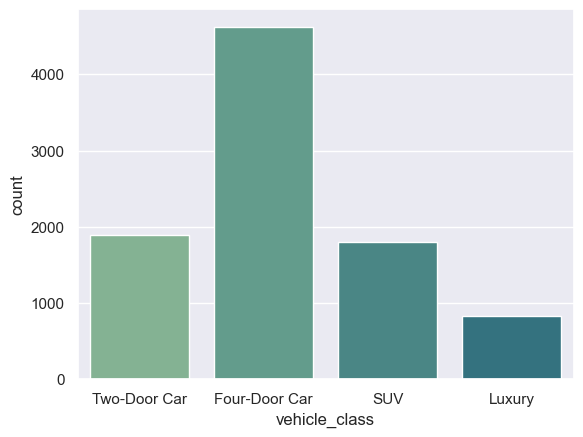

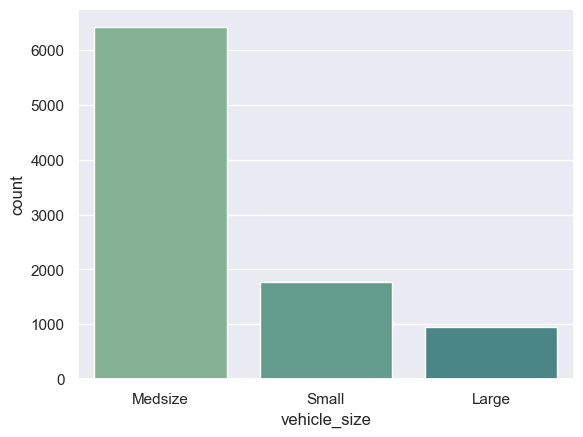

In [30]:
for column in categorical_df:
    sns.countplot(data=categorical_df, x=column)
    plt.show()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? Make any changes you feel are necessary.

In [31]:
print(customer_df['effective_to_date'].value_counts())


date_df = customer_df.copy()

date_df = date_df.sort_values(by=['effective_to_date'])


2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

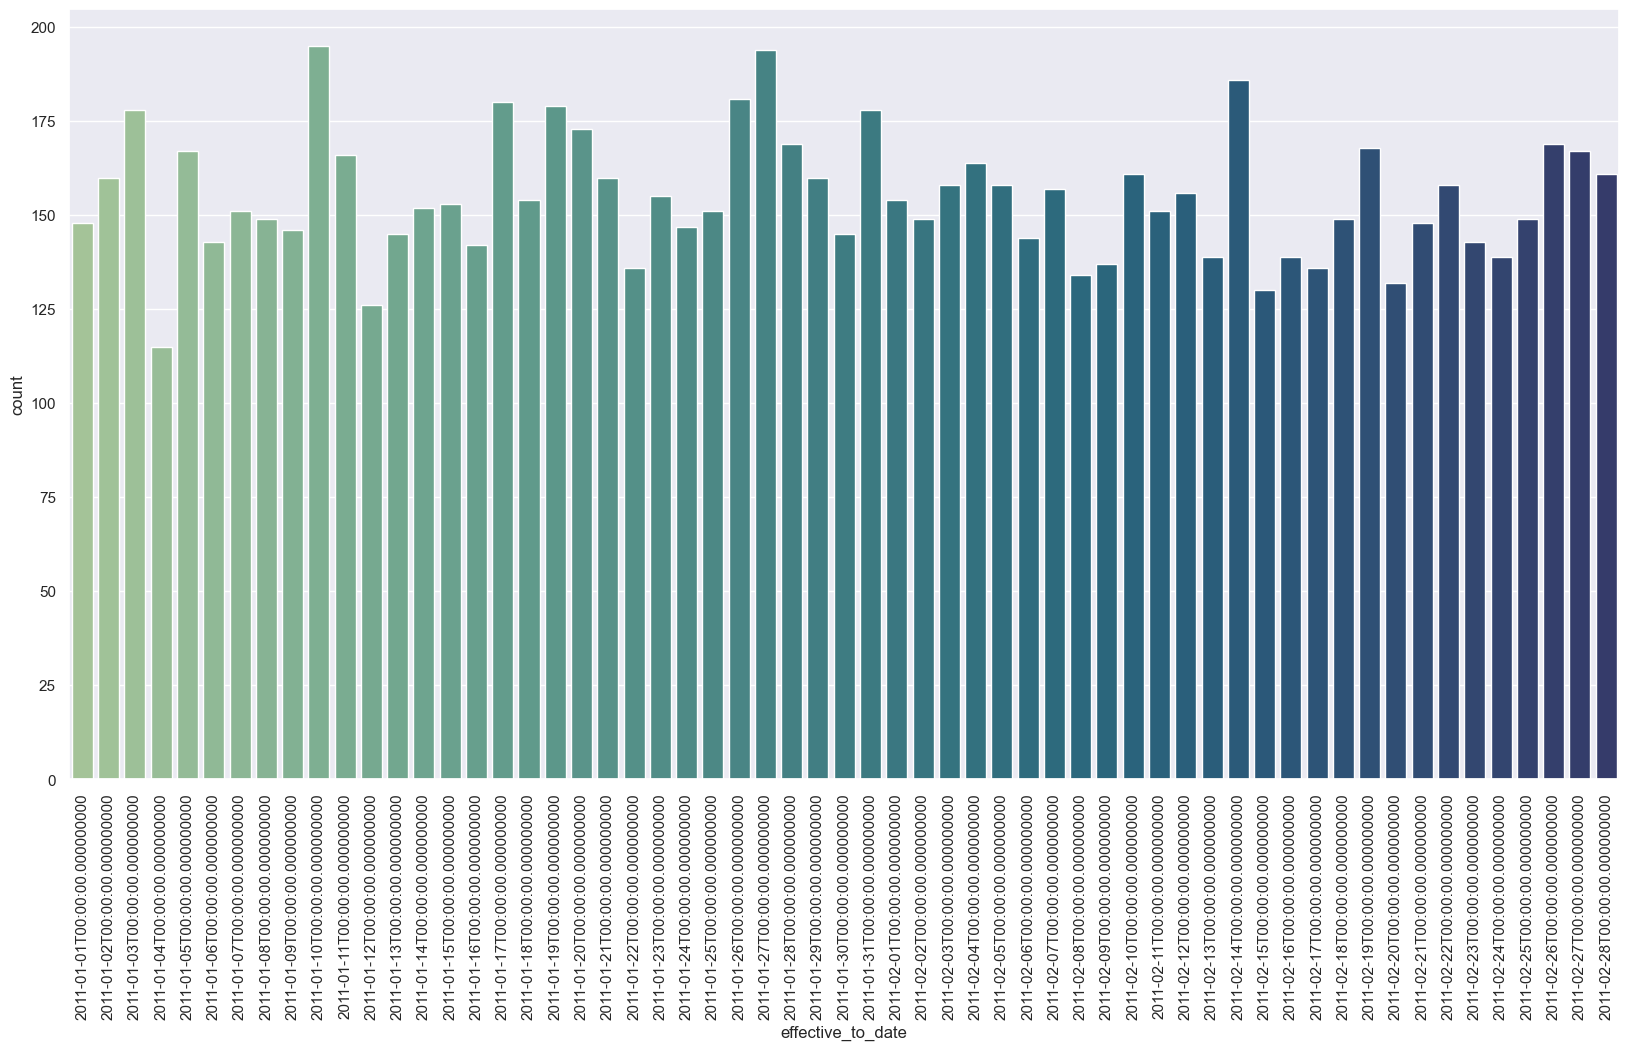

In [32]:
plt.figure(figsize = (20,10))
sns.countplot(data=date_df, x=date_df['effective_to_date'], palette = "crest")
plt.xticks(rotation=90)
plt.show()

In [36]:
# 0 Monday
# 1 Tuesday 
# 2 Wednesday
# 3 Thursday
# 4 Friday
# 5 Saturday
# 6 Sunday

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

customer_df['weekday'] = customer_df['effective_to_date'].dt.weekday
customer_df['weekday'] = customer_df['weekday'].replace(days)

customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,weekday,day,week,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Thursday,24,8,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Monday,31,5,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Saturday,19,7,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Thursday,20,3,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Thursday,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Thursday,10,6,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Saturday,12,6,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Sunday,6,5,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Thursday,3,5,2
